In [51]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
from sklearn.datasets import make_blobs
import time
import scipy.stats as stats

In [52]:
# Set Parameters
n_samples = 10000
num_bins = 20

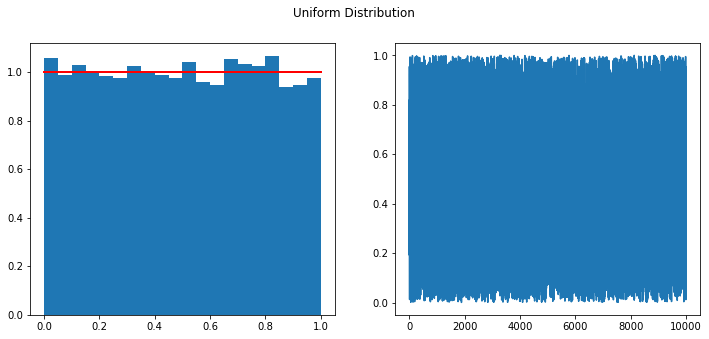

In [53]:
# Create uniform distribution
def uniform_distribution(n_samples=n_samples, num_bins=num_bins, display = True, low=0., high=1.):
    sample_uniform = (np.random.uniform(low,high,n_samples))
    if display==True:
        # Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('Uniform Distribution')
        count, bins, ignored = ax1.hist(sample_uniform, num_bins, density=True)
        ax1.plot(bins, np.ones_like(bins), linewidth=2, color='r')
        ax2.plot(sample_uniform)
    return sample_uniform

sample_uniform=uniform_distribution()

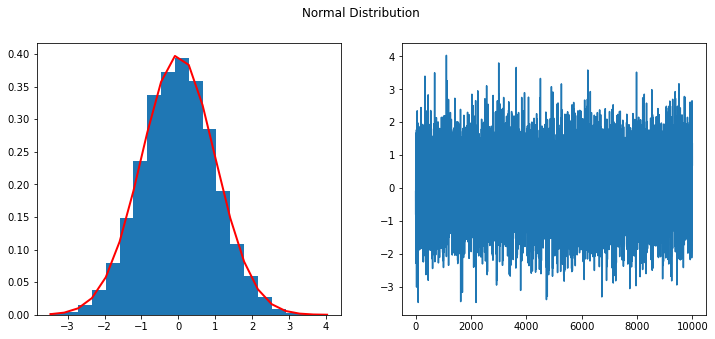

In [54]:
def normal_distribution(n_samples=n_samples, num_bins=num_bins, display = True, mu=0., sigma=1.):
    # Normal distribution
    sample_normal = np.random.normal(mu, sigma, n_samples)
    if display == True:
        # Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('Normal Distribution')
        count, bins, ignored = ax1.hist(sample_normal, num_bins, density=True)
        ax1.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                       np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
                 linewidth=2, color='r')
        ax2.plot(sample_normal)
    return sample_normal

sample_normal = normal_distribution()

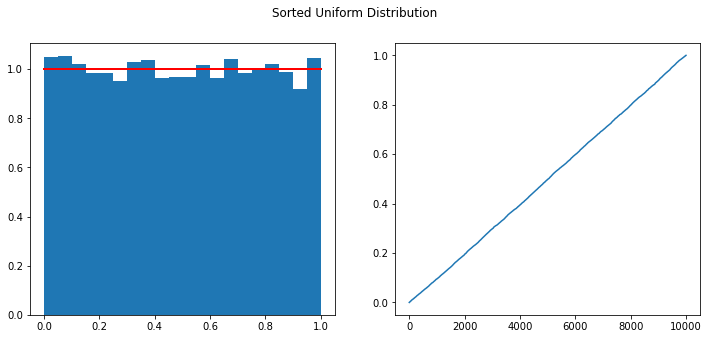

In [55]:
def uniform_sorted_distribution(n_samples=n_samples, num_bins=num_bins, display = True, low=0., high=1.):
    #Sorted Uniform distribution
    sample_uniform_sorted = np.sort(np.random.uniform(low,high,n_samples))
    if display == True:
        #Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('Sorted Uniform Distribution')
        count, bins, ignored = ax1.hist(sample_uniform_sorted, num_bins, density=True)
        ax1.plot(bins, np.ones_like(bins), linewidth=2, color='r')
        ax2.plot(sample_uniform_sorted)
    return sample_uniform_sorted
sample_uniform_sorted = uniform_sorted_distribution()

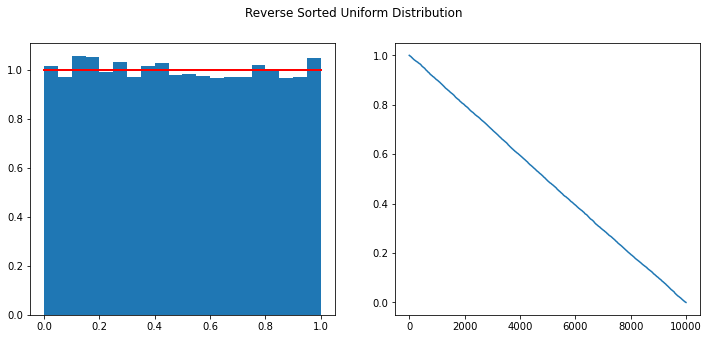

In [56]:
def uniform_reverse_sorted_distribution(n_samples=n_samples, num_bins=num_bins, display = True, low=0., high=1.):
    # Reverse Sorted Uniform distribution
    sample_uniform_reverse_sorted = np.sort(np.random.uniform(low,high,n_samples))[::-1]
    if display == True:
        # Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('Reverse Sorted Uniform Distribution')
        count, bins, ignored = ax1.hist(sample_uniform_reverse_sorted, num_bins, density=True)
        ax1.plot(bins, np.ones_like(bins), linewidth=2, color='r')
        ax2.plot(sample_uniform_reverse_sorted)
    return sample_uniform_reverse_sorted
sample_uniform_reverse_sorted = uniform_reverse_sorted_distribution()

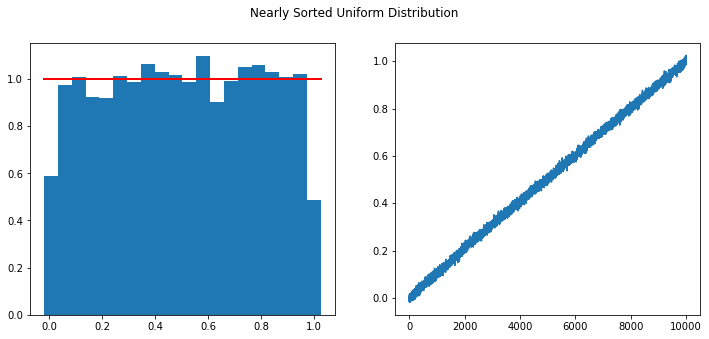

In [57]:
def uniform_nearly_sorted_distribution(n_samples=n_samples, num_bins=num_bins, display = True, low=0., high=1., mean_noise= 0., std_noice = 0.01):
    # Nearly Uniform distribution
    sample_uniform_nearly_sorted = np.sort(np.random.uniform(low,high,n_samples))
    noise = np.random.normal(mean_noise,std_noice,n_samples)
    sample_uniform_nearly_sorted = sample_uniform_nearly_sorted + noise
    if display==True:
        #Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('Nearly Sorted Uniform Distribution')
        count, bins, ignored = ax1.hist(sample_uniform_nearly_sorted, num_bins, density=True)
        ax1.plot(bins, np.ones_like(bins), linewidth=2, color='r')
        ax2.plot(sample_uniform_nearly_sorted)
    return sample_uniform_nearly_sorted
sample_uniform_nearly_sorted = uniform_nearly_sorted_distribution()

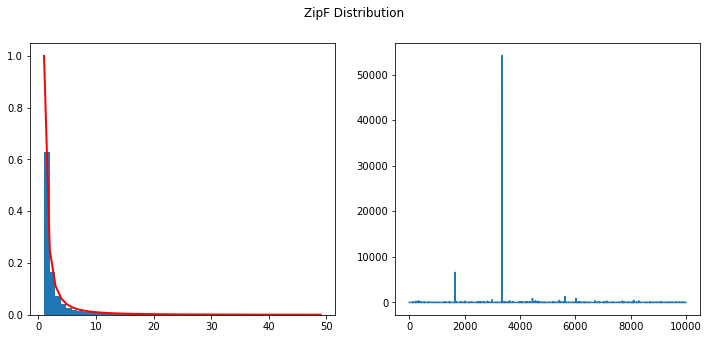

In [58]:
def zipf_distribution(n_samples=n_samples, num_bins=num_bins, display = True, a=2.):
    # ZipF Distribution
    sample_zipf = np.random.zipf(a, n_samples)
    if display==True:
        # Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('ZipF Distribution')
        count, bins, ignored = ax1.hist(sample_zipf[sample_zipf<50], 50, density=True)
        x = np.arange(1., 50.)
        y = x**(-a) / special.zetac(a)
        ax1.plot(x, y/max(y), linewidth=2, color='r')
        ax2.plot(sample_zipf)
    return sample_zipf
sample_zipf = zipf_distribution()

In [59]:
def create_df_distributions():
    sample_uniform=uniform_distribution(display=False)
    sample_normal = normal_distribution(display=False)
    sample_uniform_sorted = uniform_sorted_distribution(display=False)
    sample_uniform_reverse_sorted = uniform_reverse_sorted_distribution(display=False)
    sample_uniform_nearly_sorted = uniform_nearly_sorted_distribution(display=False)
    sample_zipf = zipf_distribution(display=False)
    df_distribions = pd.DataFrame().astype(np.float64)
    df_distribions["Uniform"] = sample_uniform
    df_distribions["Normal"] = sample_normal
    df_distribions["Uniform_Sorted"] = sample_uniform_sorted
    df_distribions["Uniform_Reverse_Sorted"] = sample_uniform_reverse_sorted
    df_distribions["Uniform_Nearly_Sorted"] = sample_uniform_nearly_sorted
    df_distribions["Zipf"] = sample_zipf
    return df_distribions

In [60]:
df_distribions = create_df_distributions()

In [61]:
df_distribions.head(5)

,Uniform,Normal,Uniform_Sorted,Uniform_Reverse_Sorted,Uniform_Nearly_Sorted,Zipf
0,0.038953,0.074437,0.000110,0.999971,-0.000014,1
1,0.458374,1.193328,0.000283,0.999888,0.003443,1
2,0.843983,1.513231,0.000415,0.999765,-0.001360,1
3,0.915298,-0.131230,0.000445,0.999738,0.011655,1
4,0.227377,0.225675,0.000493,0.999712,-0.008394,1


In [62]:
def evaluate_sorts(distribution="Uniform", repetitions=10000):
    measures = pd.DataFrame().astype(np.float64)
    for sorting_algorithm in ["quicksort", "mergesort", "heapsort"]:
        algorithm_times = []
        for i in range(repetitions):
            df_distribions = create_df_distributions()
            #print(df_distribions["Uniform"].head(3)) # are the always different?
            start_time = time.time()
            df_distribions[distribution].sort_values(kind=sorting_algorithm)
            exeuction_time = (time.time() - start_time)*1000
            algorithm_times.append(exeuction_time)
        measures[sorting_algorithm] = algorithm_times
        print("The time of",sorting_algorithm, "is", np.mean(algorithm_times), "miliseconds")
    return measures

In [63]:
print("Uniform")
df_uniform = evaluate_sorts(distribution="Uniform")

Uniform
The time of quicksort is 0.917198371887207 miliseconds
The time of mergesort is 1.014675760269165 miliseconds
The time of heapsort is 1.209453821182251 miliseconds


In [64]:
print("Normal")
df_normal = evaluate_sorts(distribution="Normal")

Normal
The time of quicksort is 0.9722639560699463 miliseconds
The time of mergesort is 1.018013024330139 miliseconds
The time of heapsort is 1.1915225744247437 miliseconds


In [65]:
print("Uniform_Sorted")
df_uniform_sorted = evaluate_sorts(distribution="Uniform_Sorted")

Uniform_Sorted
The time of quicksort is 0.45983147621154785 miliseconds
The time of mergesort is 0.3868217945098877 miliseconds
The time of heapsort is 0.8709639310836792 miliseconds


In [66]:
print("Uniform_Reverse_Sorted")
df_uniform_reverse_sorted = evaluate_sorts(distribution="Uniform_Reverse_Sorted")

Uniform_Reverse_Sorted
The time of quicksort is 0.512460470199585 miliseconds
The time of mergesort is 0.39116764068603516 miliseconds
The time of heapsort is 0.9133063793182373 miliseconds


In [67]:
print("Uniform_Nearly_Sorted")
df_uniform_nearly_sorted = evaluate_sorts(distribution="Uniform_Nearly_Sorted")

Uniform_Nearly_Sorted
The time of quicksort is 0.7922975540161132 miliseconds
The time of mergesort is 0.7880615234375 miliseconds
The time of heapsort is 1.0307071447372436 miliseconds


In [68]:
print("Zipf")
df_zipf = evaluate_sorts(distribution="Zipf")

Zipf
The time of quicksort is 0.6009363651275634 miliseconds
The time of mergesort is 0.6565699100494384 miliseconds
The time of heapsort is 0.7070807933807373 miliseconds


In [69]:
def calculate_stats(df_dist, sort_algo):
    df_sort_algo = df_dist[sort_algo]
    std_sort_algo = np.std(df_sort_algo) 
    mean_sort_algo = np.mean(df_sort_algo) 
    return df_sort_algo, std_sort_algo,mean_sort_algo

def plot_runtimes(sort_dist, std_sort_algo, mean_sort_algo):
    # Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
    fig.suptitle('Distribution')
    count, bins, ignored = ax1.hist(sort_dist, 10, density=True)
    #ax1.plot(bins, 1/(std_sort_algo * np.sqrt(2 * np.pi)) *
    #               np.exp( - (bins - mean_sort_algo)**2 / (2 * std_sort_algo**2) ),
    #         linewidth=2, color='r')
    ax2.plot(sort_dist)

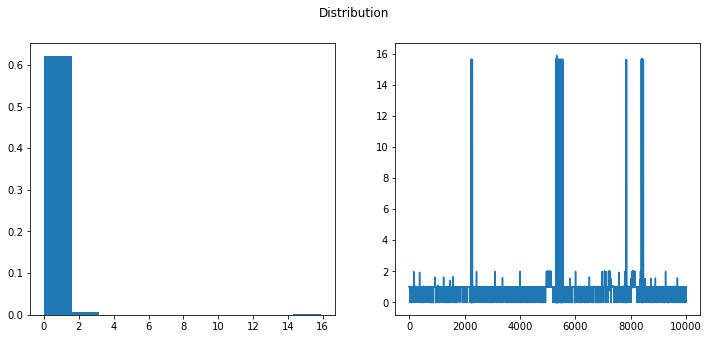

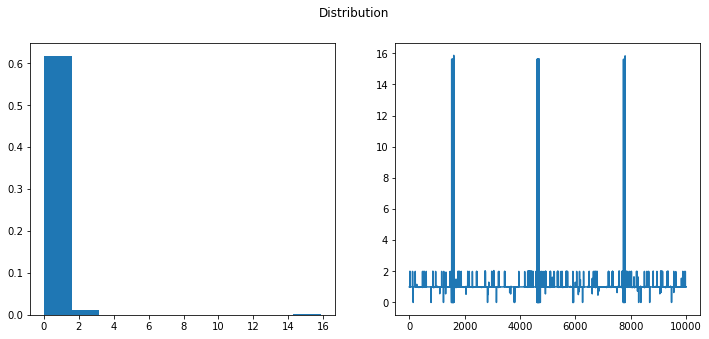

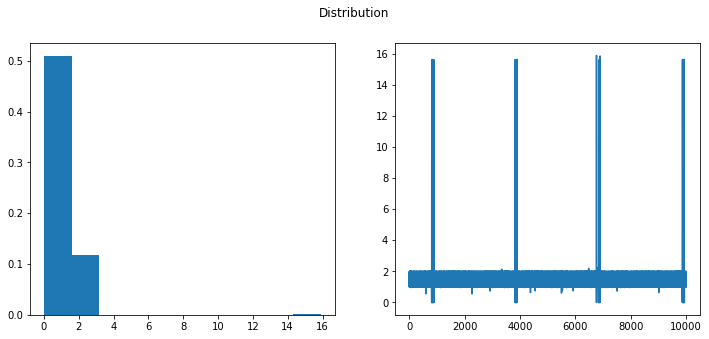

In [70]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_normal, algo)
    plot_runtimes(df,std,mean)

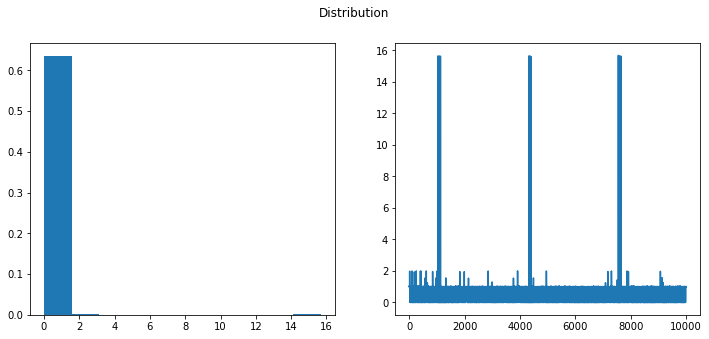

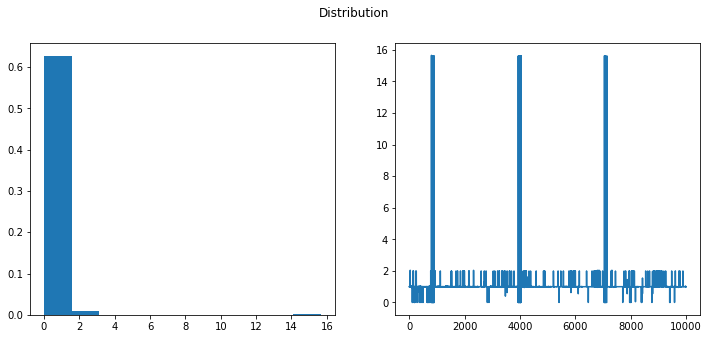

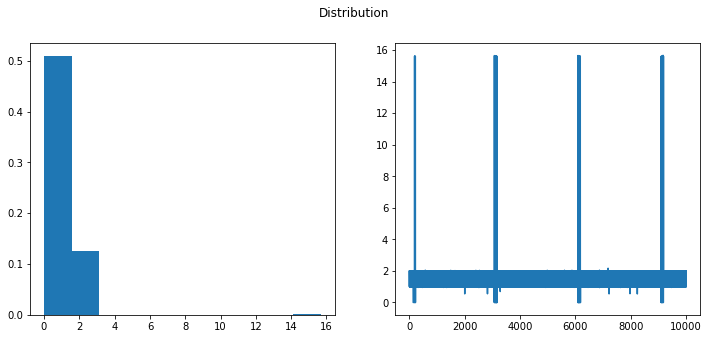

In [71]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_uniform, algo)
    plot_runtimes(df,std,mean)

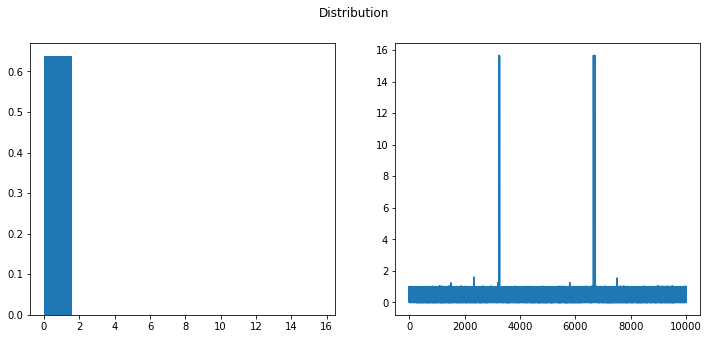

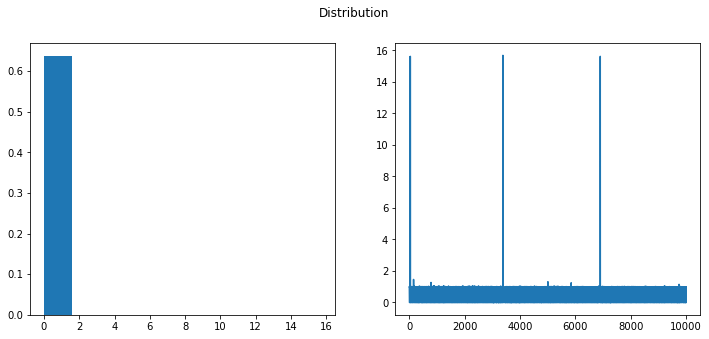

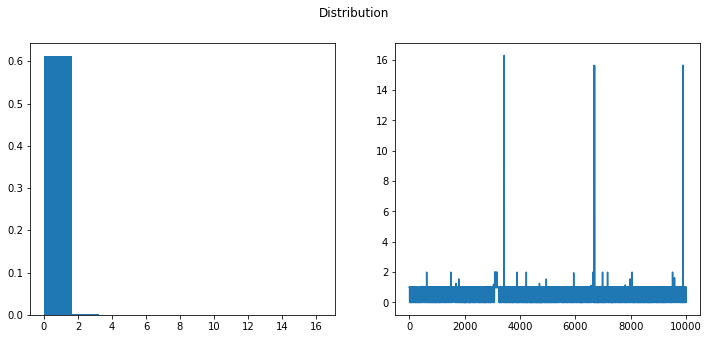

In [72]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_uniform_sorted, algo)
    plot_runtimes(df,std,mean)

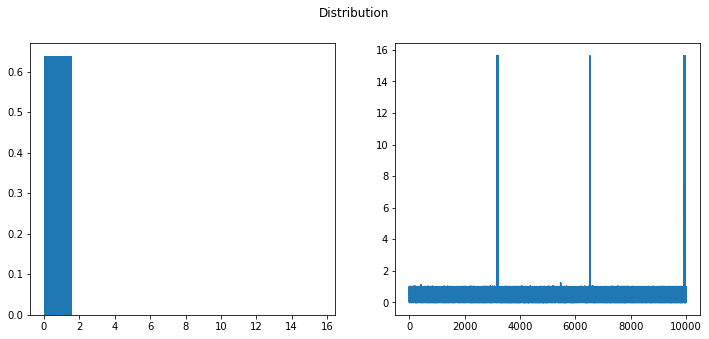

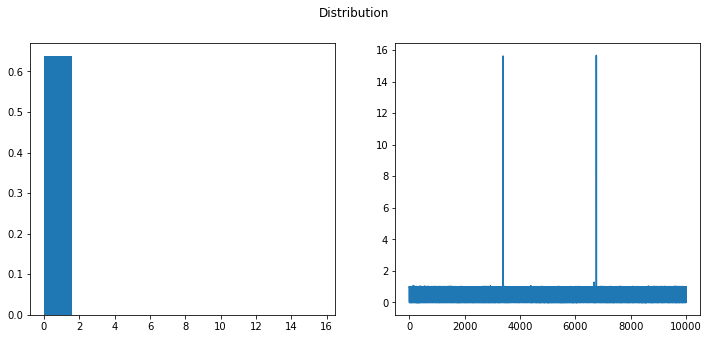

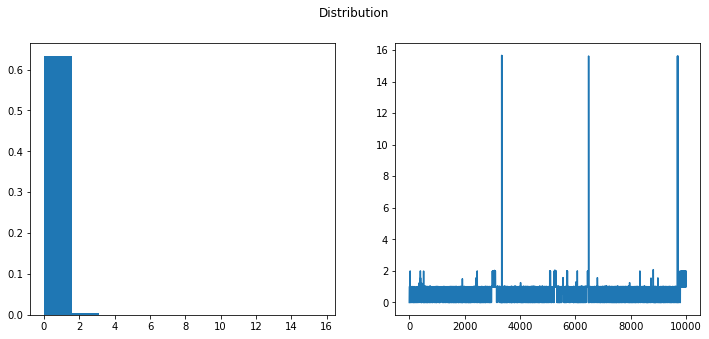

In [73]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_uniform_reverse_sorted, algo)
    plot_runtimes(df,std,mean)

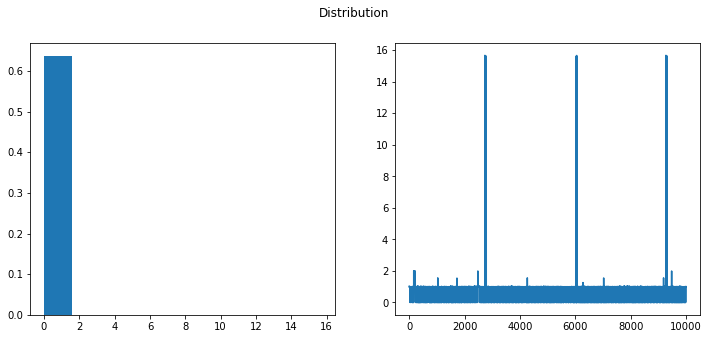

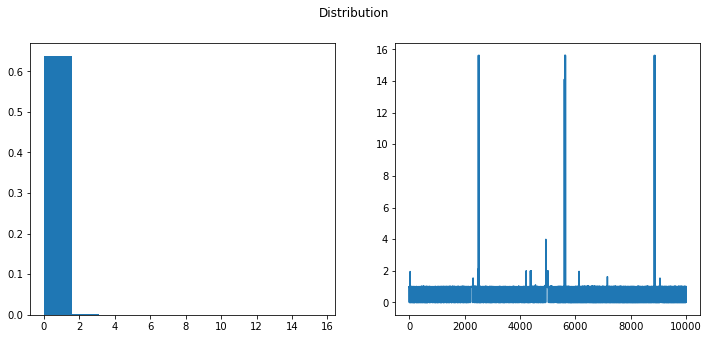

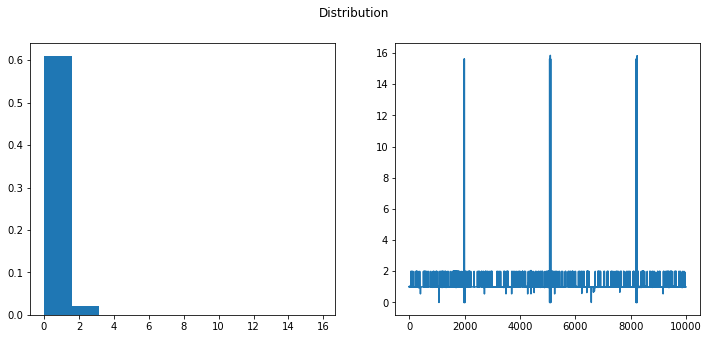

In [74]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_uniform_nearly_sorted, algo)
    plot_runtimes(df,std,mean)

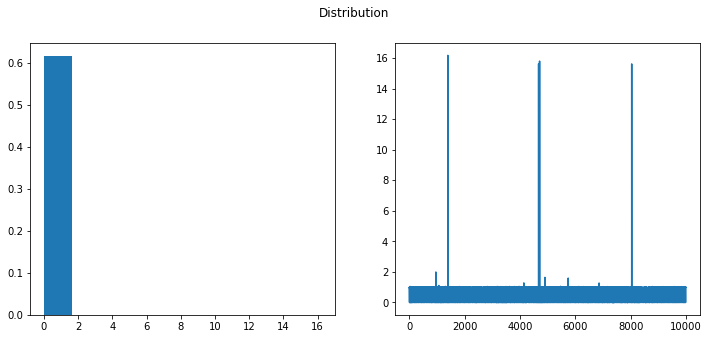

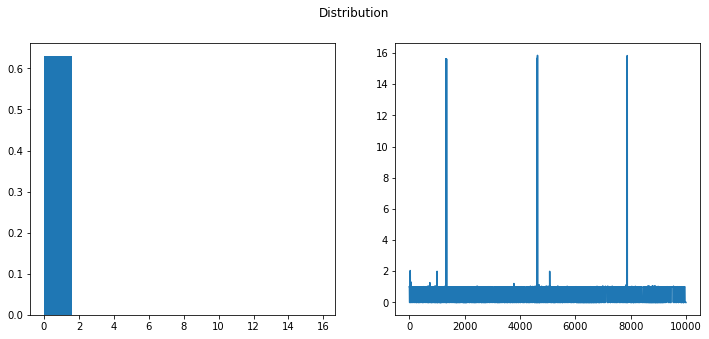

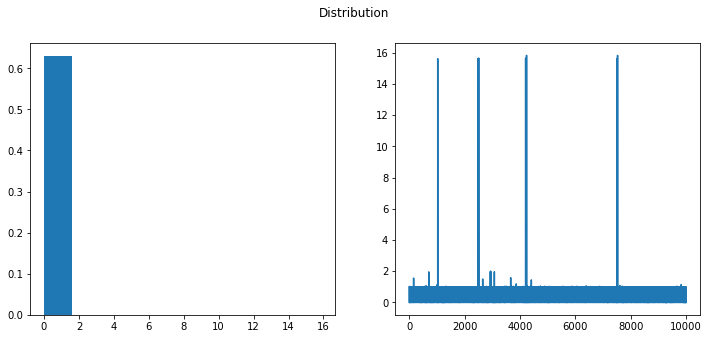

In [75]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_zipf, algo)
    plot_runtimes(df,std,mean)